In [1]:
#+++---+++#
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')
! pip3 install keras
! pip3 install matplotlib
! pip3 install numpy
! pip3 install pandas
! pip3 install sklearn
! pip3 install scikit-image


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import sklearn
from keras.datasets import cifar10
from keras.layers import Dense
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten


Using TensorFlow backend.


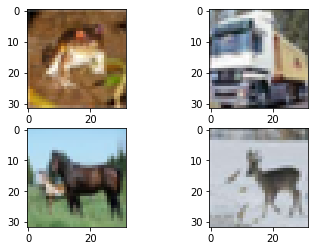

In [5]:
# importing cifar10 dataset
data=cifar10.load_data()

# splitting data into train-test

(X_train, y_train), (X_test, y_test) = data

X_train=X_train[:5000]
y_train=y_train[:5000]
X_test=X_test[:2000]
y_test=y_test[:2000]


# plotting random images for visual
ax=plt.figure()
ax.add_subplot(2,2,1)
plt.imshow(X_train[0])
ax.add_subplot(2,2,2)
plt.imshow(X_train[1])
ax.add_subplot(2,2,3)
plt.imshow(X_train[12])
ax.add_subplot(2,2,4)
plt.imshow(X_train[20])
plt.show()


In [4]:
import keras
# initiallising paarmeters
from sklearn.preprocessing import OneHotEncoder
EPOCHS=10
BATCH_SIZE=32
LR=0.01
num_classes=10
input_shape=(32,32,3)
# preprocessing

# Parse numbers as floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing
X_train/=255.
X_test/=255.

# one hot encoding labels
y_train= keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


### preprocessing done  ###


IndexError: ignored

In [7]:
# making model    *** ALEXNET model with 8 layers including 3 fc ***
def model1(input_shape,num_classes):
  
    model=Sequential()
    
    model.add(Conv2D(kernel_size=3,filters=96,activation='relu',input_shape=input_shape,strides=4))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    # layer 1
    model.add(Conv2D(256,kernel_size=5,activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    # layer 2
    model.add(Conv2D(384,padding='same',activation='relu',strides=1,kernel_size=3))
    # layer 3
    model.add(Conv2D(384,padding='same',activation='relu',strides=1,kernel_size=3))
    # layer 4
    model.add(Conv2D(256,padding='same',activation='relu',strides=1,kernel_size=3))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    # layer 5
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    # layer 6
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    # layer 7
    model.add(Dense(num_classes,activation='softmax'))
    # layer 8
    model.summary()
    return model
    
model=model1(input_shape,num_classes)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 96)          2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 384)         885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 384)         1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 256)        

In [ ]:

# early stopping and saving model if val_loss doesn't improve
cb=EarlyStopping(patience=5,monitor='val_loss',verbose=1,restore_best_weights=True)

cp=ModelCheckpoint('bestmodel_cifar.', monitor='val_loss', verbose=1, save_best_only=True)

opt=Adam(lr=LR, beta_1=0.9, beta_2=0.999)
# compiling model
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

# fitting model / training

history=model.fit(X_train,y_train,epochs=EPOCHS,callbacks=[cb,cp],verbose=1,shuffle=True,batch_size=32,validation_data=(X_test, y_test))







In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

